In [111]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import requests

api_key = '5KX601WBN1NA9XAN'
symbol = 'AAPL'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY_ADJUSTED&symbol=AAPL&apikey=5KX601WBN1NA9XAN'
response = requests.get(url)
data = response.json()
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [112]:
# Process the fetched data
df = pd.DataFrame(data['Weekly Adjusted Time Series']).T
df = df.rename(columns={'4. close': 'close'})
df['close'] = df['close'].astype(float)
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [113]:
# Set the frequency of the data to weekly (Friday)
df = df.asfreq('W-FRI')

In [ ]:
# Interpolate missing values in the 'close' column
df['close'] = df['close'].interpolate()

In [115]:
# Split the data into training and testing sets
train = df['close'][:'2023']
test = df['close']['2024':]

In [116]:
# Fit SARIMAX model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
results = model.fit()

In [117]:
# Generate forecast for the test period
forecast = results.forecast(steps=len(test))

In [118]:
# Calculate and print RMSE
rmse = sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse}')

RMSE: 24.487791605233465


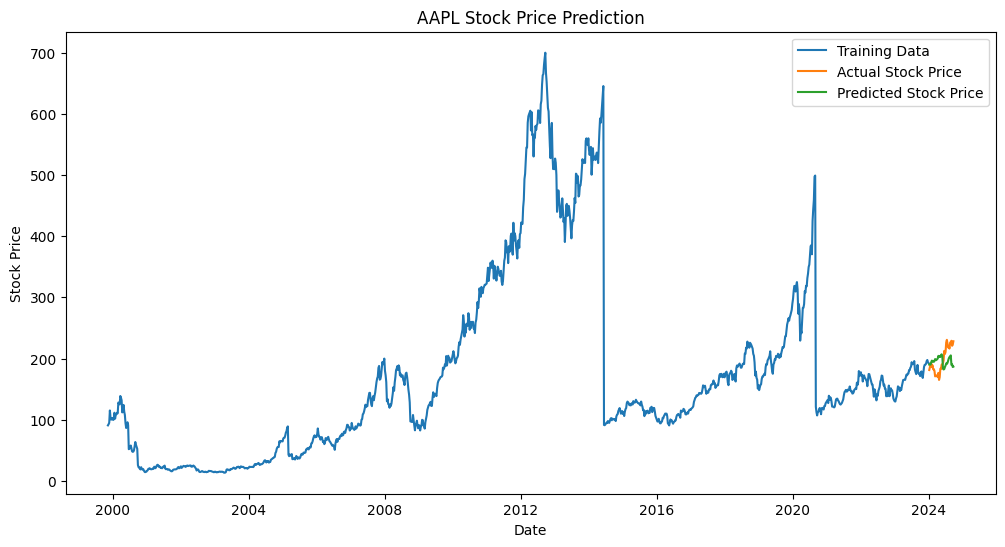

In [119]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Stock Price')
plt.plot(test.index, forecast, label='Predicted Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [184]:
# Generate and print future forecast for the next 4 weeks
future_forecast = results.forecast(steps=4)
print("Predicted stock prices for the next 4 weeks:")
print(future_forecast)

Predicted stock prices for the next 4 weeks:
2024-01-05    190.127037
2024-01-12    190.420642
2024-01-19    190.016183
2024-01-26    193.961921
Freq: W-FRI, Name: predicted_mean, dtype: float64
